In [1]:
## import pandas library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
## load the methylation dataset

In [4]:
file_path = "C:\\Users\\shikhar\\Downloads\\PupilBioTest_PMP_revA.csv"

In [5]:
data = pd.read_csv(file_path)

In [6]:
## check the methylation data 

In [7]:
data.head()

,strand,CpG_Coordinates,`000,`001,`010,`011,`100,`101,`110,`111,Sample_ID,Replicate,Tissue
0,r,10035:10044:10046,1077,9,0,0,0,0,0,4,1,Rep2,cfDNA
1,r,10035:10044:10053,1086,0,0,0,0,0,0,4,1,Rep2,cfDNA
2,r,10035:10044:10058,1069,17,0,0,0,0,0,4,1,Rep2,cfDNA
3,r,10035:10044:10071,1072,14,0,0,0,0,0,4,1,Rep2,cfDNA
4,r,10035:10044:10075,1086,0,0,0,0,0,0,4,1,Rep2,cfDNA


In [8]:
data.tail()

,strand,CpG_Coordinates,`000,`001,`010,`011,`100,`101,`110,`111,Sample_ID,Replicate,Tissue
15392178,f,9998:10121:10133,76,0,0,0,0,0,0,0,80,Rep1,Islet
15392179,f,9998:10121:10140,47,0,0,0,0,0,0,0,80,Rep1,Islet
15392180,f,9998:10130:10133,76,0,0,0,0,0,0,0,80,Rep1,Islet
15392181,f,9998:10130:10140,47,0,0,0,0,0,0,0,80,Rep1,Islet
15392182,f,9998:10133:10140,47,0,0,0,0,0,0,0,80,Rep1,Islet


In [9]:
data["Tissue"].unique()

array(['cfDNA', 'Islet'], dtype=object)

In [10]:
data["Tissue"].value_counts()

Tissue
cfDNA    11602083
Islet     3790100
Name: count, dtype: int64

In [11]:
## check the NAN value in each column 

In [12]:
data.isna().sum()

strand             0
CpG_Coordinates    0
`000               0
`001               0
`010               0
`011               0
`100               0
`101               0
`110               0
`111               0
Sample_ID          0
Replicate          0
Tissue             0
dtype: int64

In [13]:
data["Replicate"].unique()

array(['Rep2', 'Rep1'], dtype=object)

In [14]:
data["Sample_ID"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80], dtype=int64)

In [15]:
# Calculate total coverage for each CpG site

In [16]:
data.columns.tolist()

['strand',
 'CpG_Coordinates',
 '`000',
 '`001',
 '`010',
 '`011',
 '`100',
 '`101',
 '`110',
 '`111',
 'Sample_ID',
 'Replicate',
 'Tissue']

In [17]:
# Renaming columns
data.rename(columns={
    '`000': '000',
    '`001': '001',
    '`010': '010',
    '`011': '011',
    '`100': '100',
    '`101': '101',
    '`110': '110',
    '`111': '111'
}, inplace=True)

In [18]:
data.columns.tolist()

['strand',
 'CpG_Coordinates',
 '000',
 '001',
 '010',
 '011',
 '100',
 '101',
 '110',
 '111',
 'Sample_ID',
 'Replicate',
 'Tissue']

In [19]:
data['Total_Coverage'] = data[['000', '001', '010', '011', '100', '101', '110', '111']].sum(axis=1)

In [20]:
data.head()

,strand,CpG_Coordinates,000,001,010,011,100,101,110,111,Sample_ID,Replicate,Tissue,Total_Coverage
0,r,10035:10044:10046,1077,9,0,0,0,0,0,4,1,Rep2,cfDNA,1090
1,r,10035:10044:10053,1086,0,0,0,0,0,0,4,1,Rep2,cfDNA,1090
2,r,10035:10044:10058,1069,17,0,0,0,0,0,4,1,Rep2,cfDNA,1090
3,r,10035:10044:10071,1072,14,0,0,0,0,0,4,1,Rep2,cfDNA,1090
4,r,10035:10044:10075,1086,0,0,0,0,0,0,4,1,Rep2,cfDNA,1090


In [21]:
data.tail()

,strand,CpG_Coordinates,000,001,010,011,100,101,110,111,Sample_ID,Replicate,Tissue,Total_Coverage
15392178,f,9998:10121:10133,76,0,0,0,0,0,0,0,80,Rep1,Islet,76
15392179,f,9998:10121:10140,47,0,0,0,0,0,0,0,80,Rep1,Islet,47
15392180,f,9998:10130:10133,76,0,0,0,0,0,0,0,80,Rep1,Islet,76
15392181,f,9998:10130:10140,47,0,0,0,0,0,0,0,80,Rep1,Islet,47
15392182,f,9998:10133:10140,47,0,0,0,0,0,0,0,80,Rep1,Islet,47


In [22]:
len(data)

15392183

In [23]:
# Group data by Tissue type and calculate median and CV

In [24]:
tissue_stats = data.groupby('Tissue')['Total_Coverage'].agg(['median', 'mean', 'std'])

In [25]:
tissue_stats

,median,mean,std
Tissue,,,
Islet,84.0,147.359490,167.470211
cfDNA,484.0,1013.508239,1338.977645


In [26]:
tissue_stats['CV'] = (tissue_stats['std'] / tissue_stats['mean']) * 100

In [27]:
tissue_stats

,median,mean,std,CV
Tissue,,,,
Islet,84.0,147.359490,167.470211,113.647387
cfDNA,484.0,1013.508239,1338.977645,132.113149


In [28]:
# Boxplot for total coverage

<Figure size 1000x600 with 0 Axes>

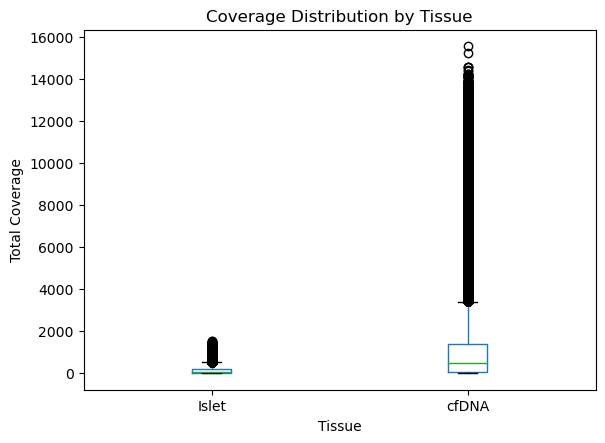

In [29]:
plt.figure(figsize=(10, 6))
data.boxplot(column='Total_Coverage', by='Tissue', grid=False)
plt.title('Coverage Distribution by Tissue')
plt.suptitle('')
plt.xlabel('Tissue')
plt.ylabel('Total Coverage')
plt.show()


In [30]:
# Bar plot for median coverage

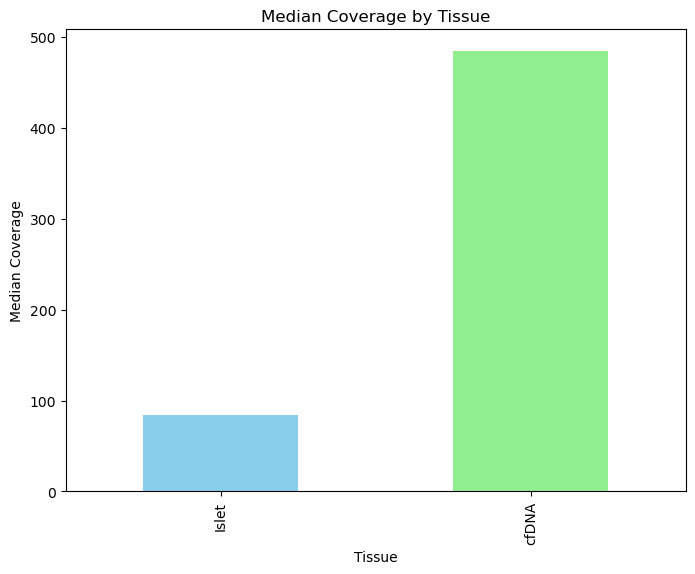

In [31]:
plt.figure(figsize=(8, 6))
tissue_stats['median'].plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Median Coverage by Tissue')
plt.ylabel('Median Coverage')
plt.show()

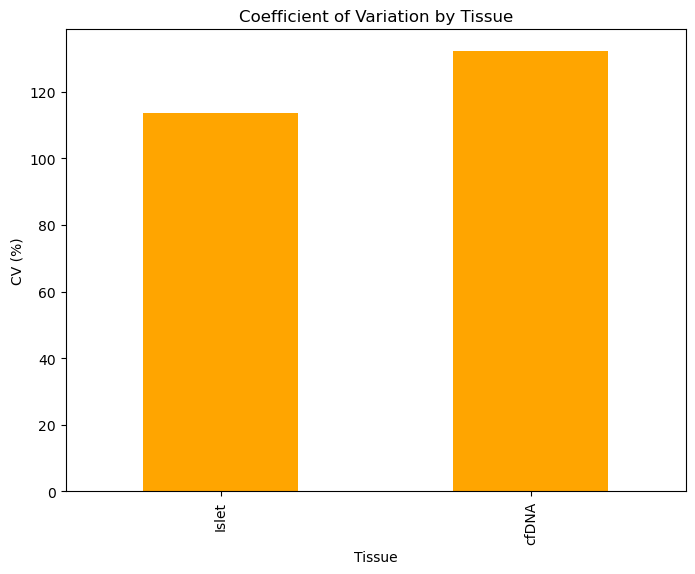

In [32]:
# Plot for CV (Coefficient of Variation)
plt.figure(figsize=(8, 6))
tissue_stats['CV'].plot(kind='bar', color='orange')
plt.title('Coefficient of Variation by Tissue')
plt.ylabel('CV (%)')
plt.show()

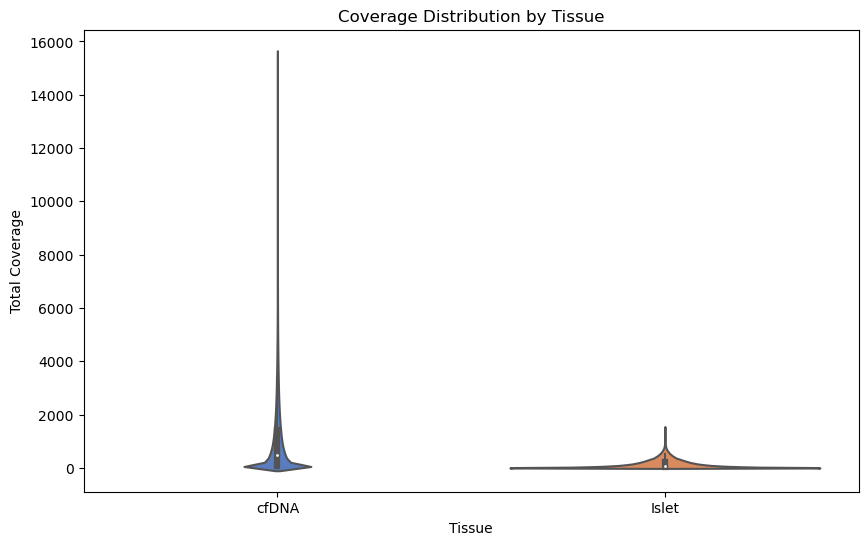

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.violinplot(x='Tissue', y='Total_Coverage', data=data, inner='box', palette='muted')
plt.title('Coverage Distribution by Tissue')
plt.xlabel('Tissue')
plt.ylabel('Total Coverage')
plt.show()
